In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5

#importing glob for filepaths
import glob

In [6]:
# getting the file paths for snap = 15-28 hdf5 files
f_15 = glob.glob("fine/*s15.hdf5")
f_16 = glob.glob("fine/*s16.hdf5")
f_17 = glob.glob("fine/*s17.hdf5")
f_18 = glob.glob("fine/*s18.hdf5")
f_19 = glob.glob("fine/*s19.hdf5")
f_20 = glob.glob("fine/*s20.hdf5")
f_21 = glob.glob("fine/*s21.hdf5")
f_22 = glob.glob("fine/*s22.hdf5")
f_23 = glob.glob("fine/*s23.hdf5")
f_24 = glob.glob("fine/*s24.hdf5")
f_25 = glob.glob("fine/*s25.hdf5")
f_26 = glob.glob("fine/*s26.hdf5")
f_27 = glob.glob("fine/*s27.hdf5")
f_28 = glob.glob("fine/*s28.hdf5")

In [7]:
f = h5.File(f_15[0], 'r')
print(f.keys())
print(f['CC'].keys())
print(f['CC']['BH-Gas'].keys())
f.close()

<KeysViewHDF5 ['2pCF', 'CC', 'Pk']>
<KeysViewHDF5 ['BH-Gas']>
<KeysViewHDF5 ['r', 'xi0']>


In [8]:
## reading DM, Gas and All Matter 2pCF from the files

# Arrays to save the data
Master_2pCF = []
Master_CC   = []

for z_path in (f_15, f_16, f_17, f_18, f_19, f_20, f_21, f_22, f_23, f_24, f_25, f_26, f_27, f_28):
    DM = []; Gas = []; All = []; CC = []
    for name in z_path:
        f = h5.File(name, 'r')
        DM.append([f['2pCF']['DM']['r'][:], f['2pCF']['DM']['xi0'][:]])
        Gas.append([f['2pCF']['gas']['r'][:], f['2pCF']['gas']['xi0'][:]])
        All.append([f['2pCF']['all_matter']['r'][:], f['2pCF']['all_matter']['xi0'][:]])
        CC.append([f['CC']['BH-Gas']['r'][:], f['CC']['BH-Gas']['xi0'][:]])
        f.close()
        
    # concatenating the data
    Master_2pCF.append([DM, Gas, All])
    Master_CC.append(CC)

In [9]:
## Reading DM, Gas and All Matter Power Spectrum from the files
# Arrays to save the data
Master_Pk = []

for z_path in (f_15, f_16, f_17, f_18, f_19, f_20, f_21, f_22, f_23, f_24, f_25, f_26, f_27, f_28):
    DM = []; Gas = []; All = []
    for name in z_path:
        f = h5.File(name, 'r')
        DM.append( [f['Pk']['DM']['k'][:], f['Pk']['DM']['Pk0'][:]])
        Gas.append([f['Pk']['gas']['k'][:], f['Pk']['gas']['Pk0'][:]])
        All.append([f['Pk']['all_matter']['k'][:], f['Pk']['all_matter']['Pk0'][:]])
        f.close()
    Master_Pk.append([DM, Gas, All])

In [19]:
np.shape(Master_2pCF)

c:\Users\bipra\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(14, 3, 2, 2)

In [14]:
# array of z_vals
z_vals = [2.012, 1.74, 1.49, 1.26, 1.0, 0.87, 0.74, 0.62, 0.5, 0.37, 0.27, 0.18, 0.1, 0.0]

In [49]:
# computing hard cutoff xlimits
box_size = 50
h = 0.6777

h1 = (h*box_size)/10
h2 = 2*np.pi/h1

There will be one master figure with 3 subplots corresponding to different ranges of z, which are as follows:  
subplot 1: z = 2.012 - 1  
subplot 2: z = 1.8 - 0.5  
subplot 3: z = 0.5 - 0.0


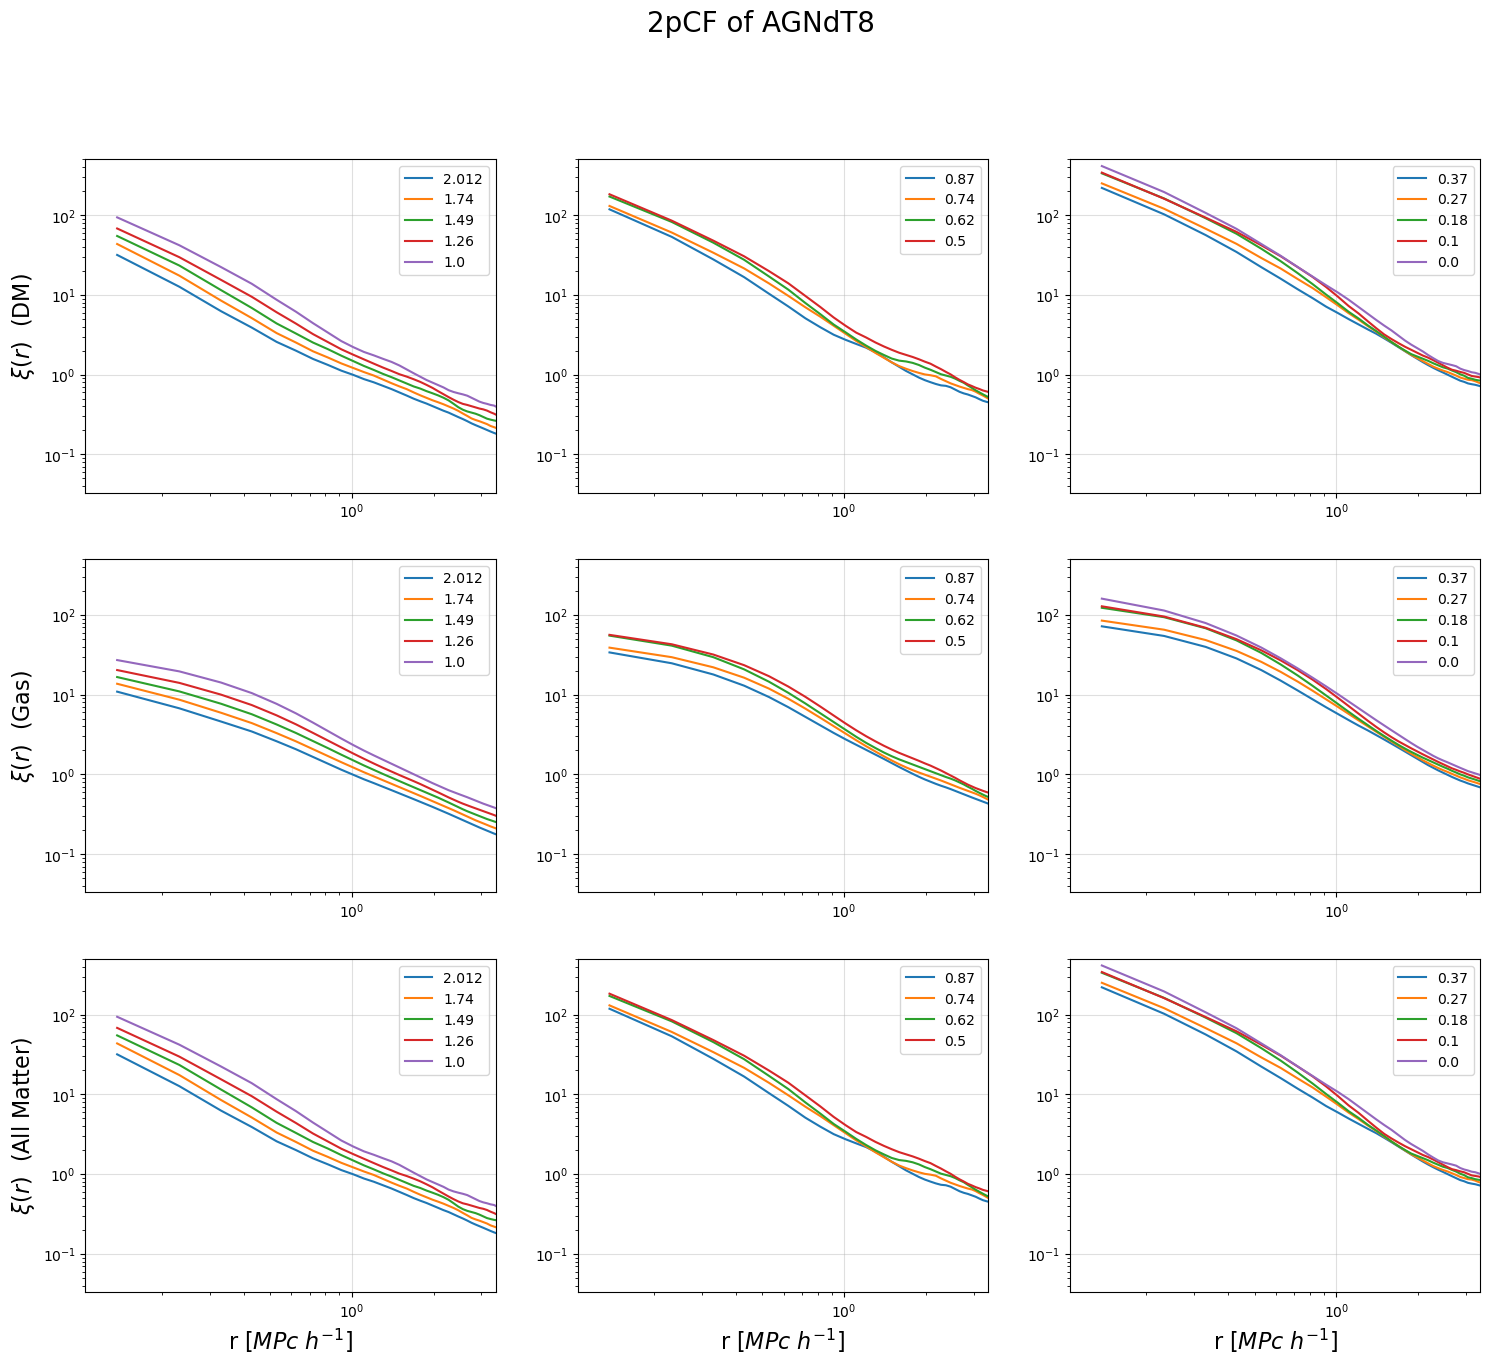

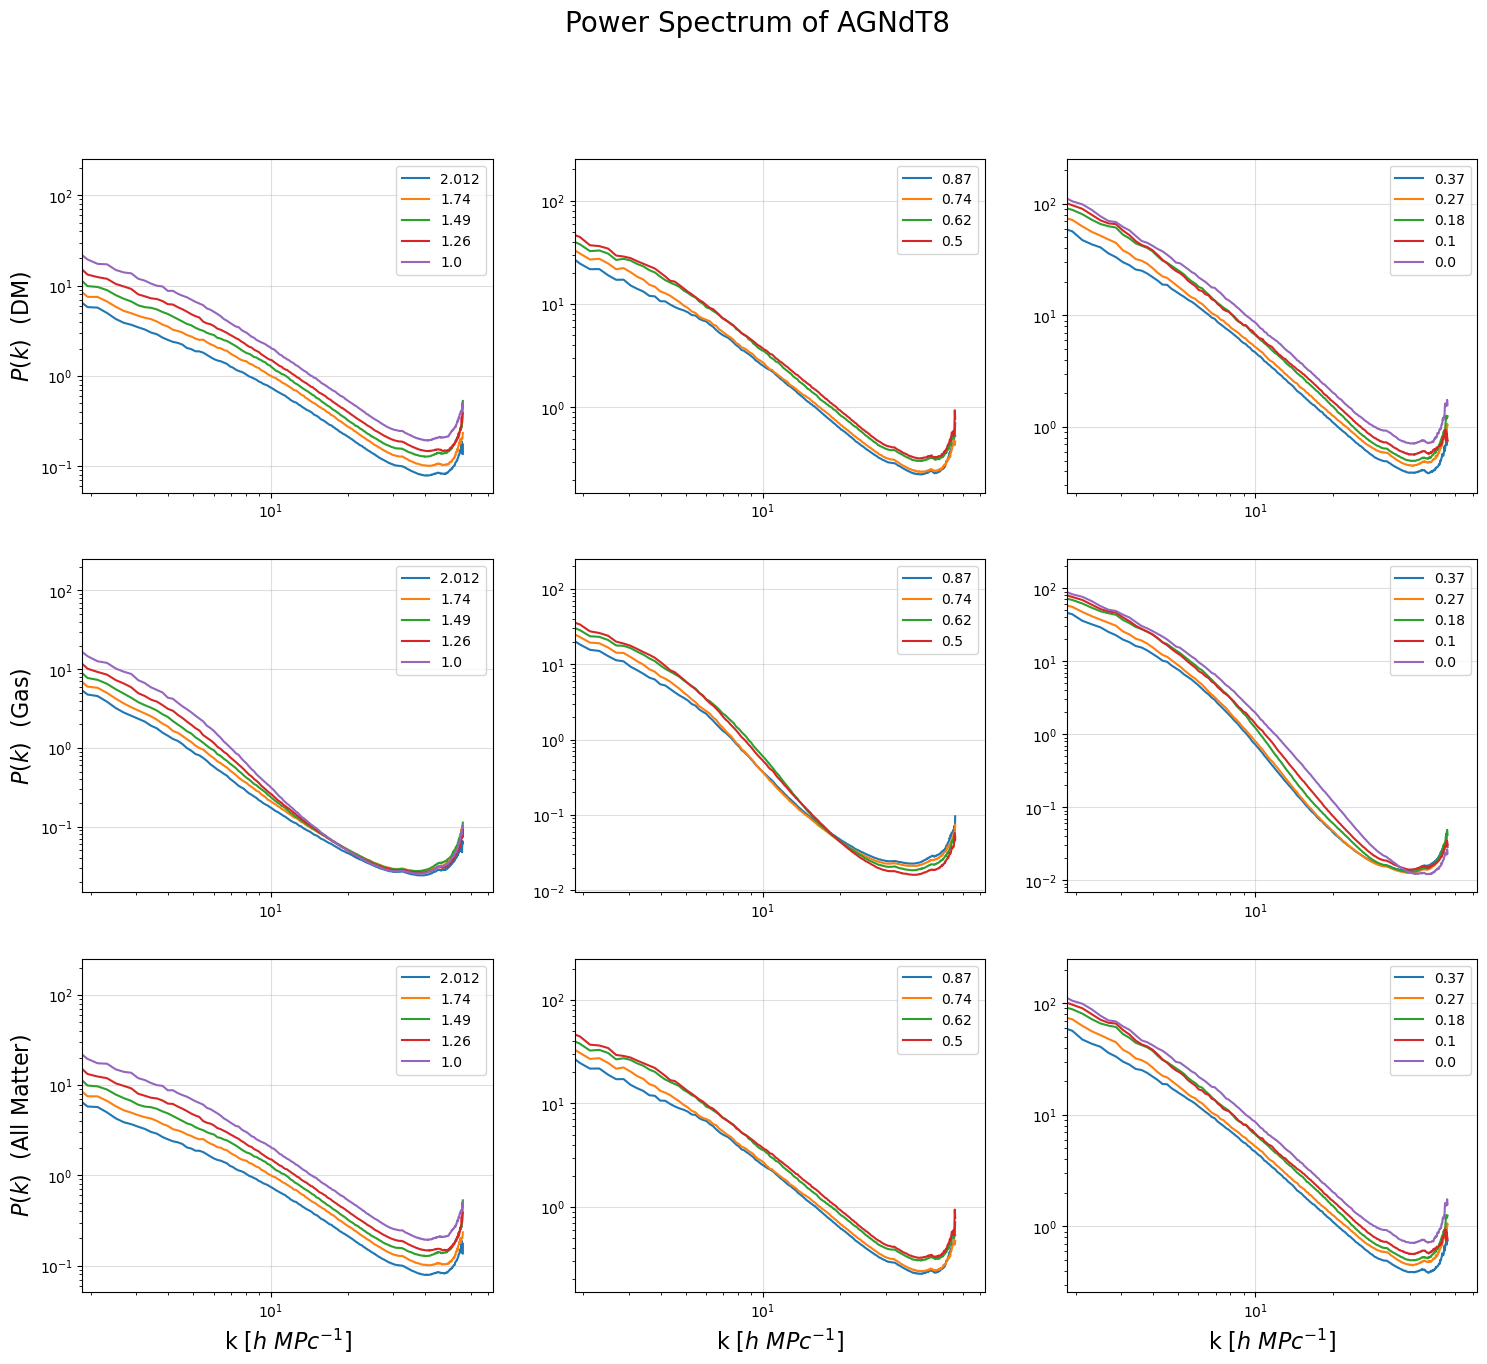

In [54]:
# breakpoints corresponding to above intervals
breakpoints = [5, 9, 14]
y_labels = ["(DM)", "(Gas)", "(All Matter)"]

fig, ax = plt.subplots(3,3, figsize=(18,15), dpi=100)

for c in range(3):
    last_break = 0
    ax[c,0].set_ylabel('$\\xi(r)$  '+y_labels[c], fontsize=16)
    for i in enumerate(breakpoints):
        # iterating over the Master_2pCF array with the breakpoints
        for j in range(last_break, i[1]):
            ax[c, i[0]].loglog(Master_2pCF[j][c][0][0], Master_2pCF[j][c][0][1], label=z_vals[j])
        ax[c,i[0]].set_xlim(right= h1)
        ax[c,i[0]].set_ylim((1e-1)/3, (1e3)/2)
        ax[c,i[0]].grid(alpha=0.4)
        ax[c,i[0]].legend()
        last_break = i[1]
        if c==2:
            ax[c,i[0]].set_xlabel('r [$MPc~h^{-1}$]', fontsize=16)
fig.suptitle('2pCF of AGNdT8', fontsize=20);
plt.savefig("AGNdT8_2pCF.jpg", bbox_inches='tight', dpi=300)


# now plotting power spectrum
fig, ax = plt.subplots(3,3, figsize=(18,15), dpi=100)
for c in range(3):
    last_break = 0
    ax[c,0].set_ylabel('$P(k)$  '+y_labels[c], fontsize=16)
    for i in enumerate(breakpoints):
        # iterating over the Master_2pCF array with the breakpoints
        for j in range(last_break, i[1]):
            ax[c, i[0]].loglog(Master_Pk[j][c][0][0][:-2], Master_Pk[j][c][0][1][:-2], label=z_vals[j])
        ax[c,i[0]].set_xlim(left= h2)
        ax[c,i[0]].set_ylim(top=(1e3)/4)
        ax[c,i[0]].legend()
        ax[c,i[0]].grid(alpha=0.4)
        last_break = i[1]
        if c==2:
            ax[c,i[0]].set_xlabel('k [$h~MPc^{-1}$]', fontsize=16)
fig.suptitle('Power Spectrum of AGNdT8', fontsize=20);
plt.savefig("AGNdT8_Pk.jpg", bbox_inches='tight', dpi=300)

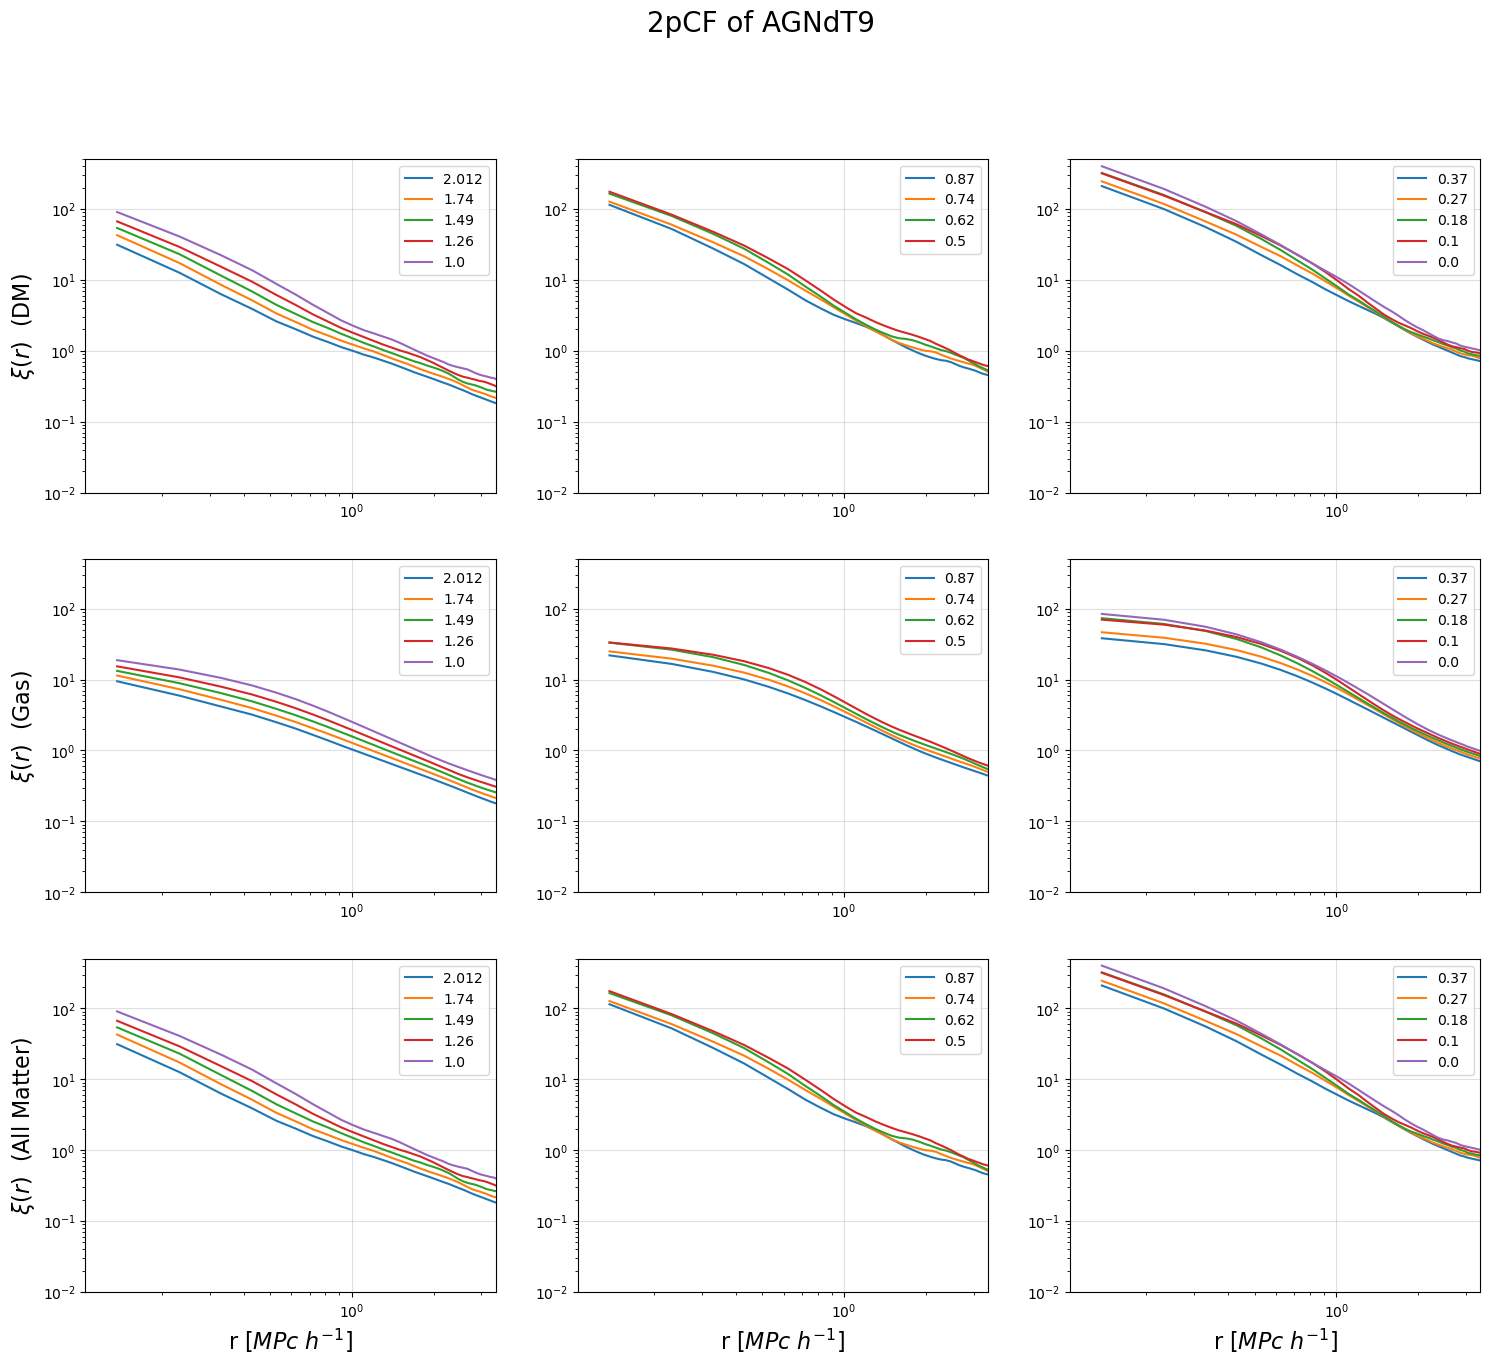

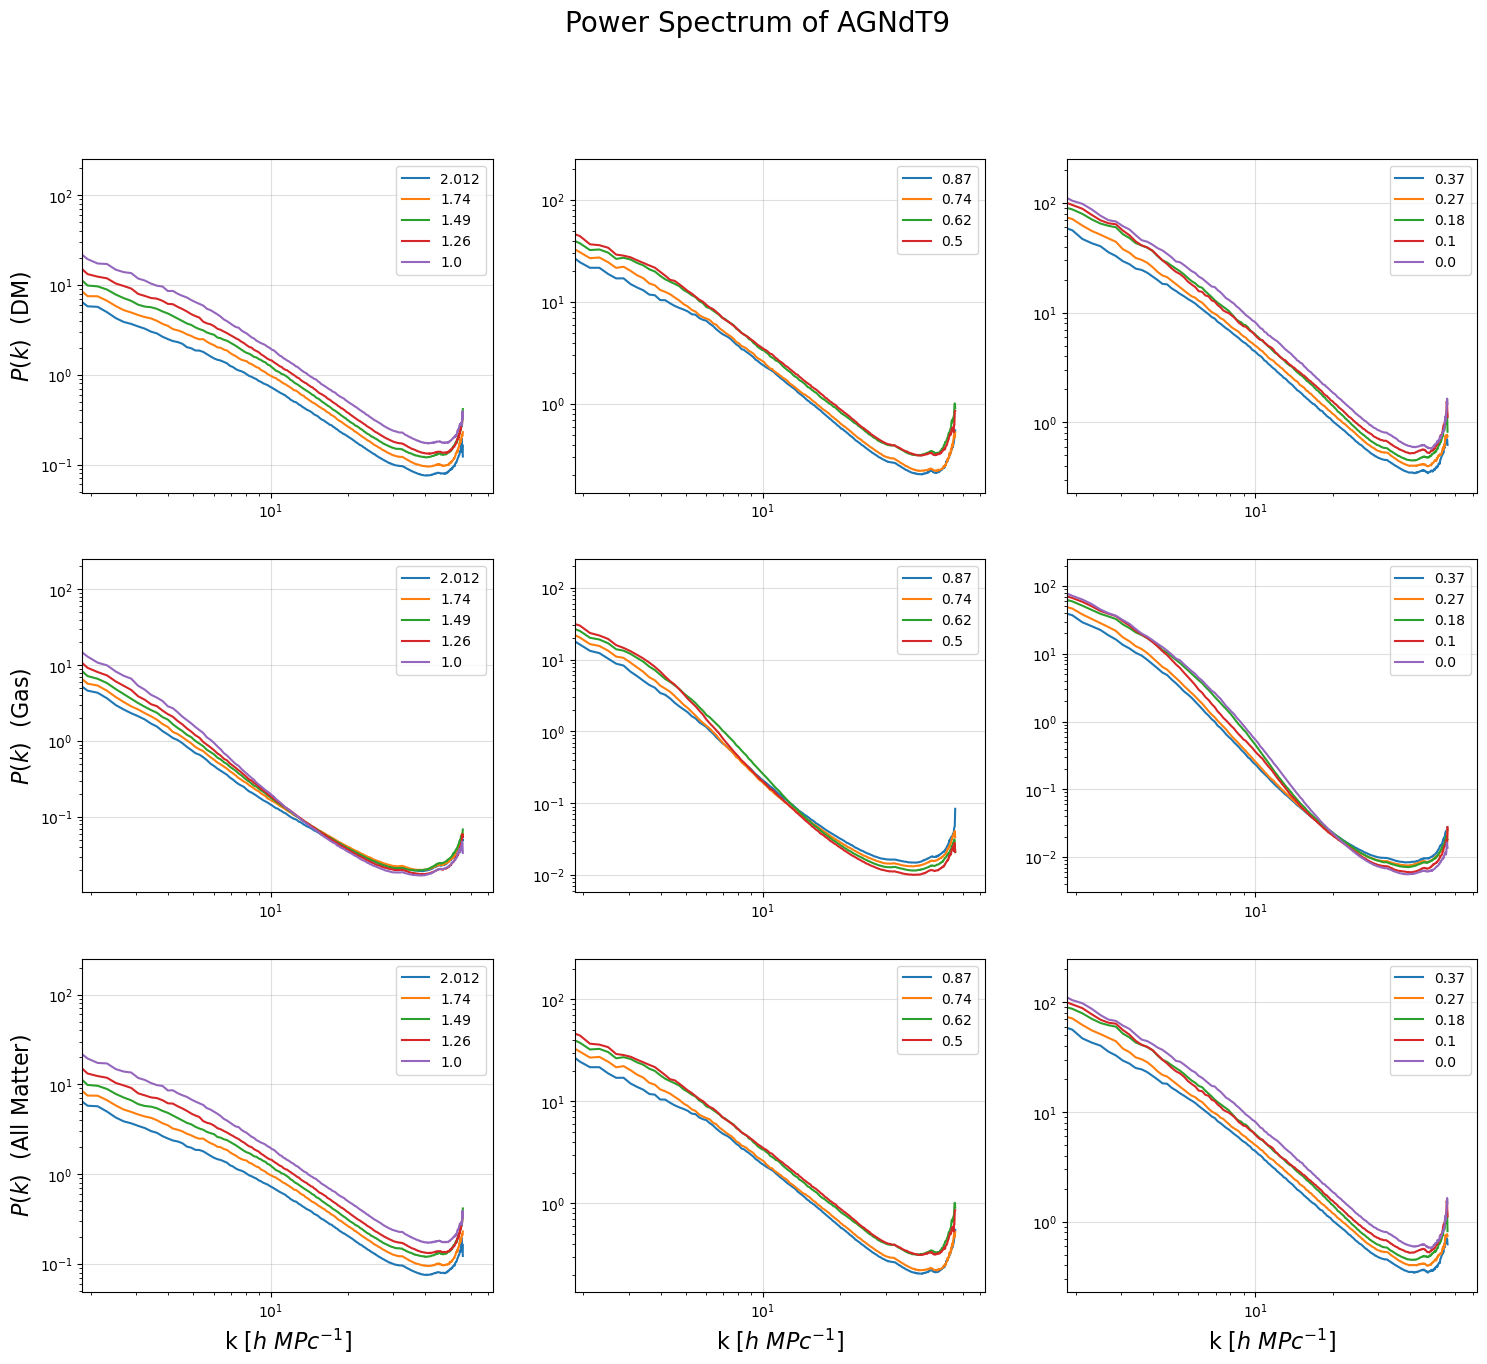

In [53]:
# breakpoints corresponding to above intervals
breakpoints = [5, 9, 14]
y_labels = ["(DM)", "(Gas)", "(All Matter)"]

fig, ax = plt.subplots(3,3, figsize=(18,15), dpi=100)

for c in range(3):
    last_break = 0
    ax[c,0].set_ylabel('$\\xi(r)$  '+y_labels[c], fontsize=16)
    for i in enumerate(breakpoints):
        # iterating over the Master_2pCF array with the breakpoints
        for j in range(last_break, i[1]):
            ax[c, i[0]].loglog(Master_2pCF[j][c][1][0], Master_2pCF[j][c][1][1], label=z_vals[j])
        ax[c,i[0]].set_xlim(right=h1)
        ax[c,i[0]].set_ylim((1e-2), (1e3)/2)
        ax[c,i[0]].legend()
        ax[c,i[0]].grid(alpha=0.4)
        last_break = i[1]
        if c==2:
            ax[c,i[0]].set_xlabel('r [$MPc~h^{-1}$]', fontsize=16)
fig.suptitle('2pCF of AGNdT9', fontsize=20);
plt.savefig("AGNdT9_2pCF.jpg", bbox_inches='tight', dpi=300)


# now plotting power spectrum
fig, ax = plt.subplots(3,3, figsize=(18,15), dpi=100)
for c in range(3):
    last_break = 0
    ax[c,0].set_ylabel('$P(k)$  '+y_labels[c], fontsize=16)
    for i in enumerate(breakpoints):
        # iterating over the Master_2pCF array with the breakpoints
        for j in range(last_break, i[1]):
            ax[c, i[0]].loglog(Master_Pk[j][c][1][0][:-2], Master_Pk[j][c][1][1][:-2], label=z_vals[j])
        ax[c,i[0]].set_xlim(left= h2)
        ax[c,i[0]].set_ylim(top = (1e3)/4)
        ax[c,i[0]].legend()
        ax[c,i[0]].grid(alpha=0.4)
        last_break = i[1]
        if c==2:
            ax[c,i[0]].set_xlabel('k [$h~MPc^{-1}$]', fontsize=16)
fig.suptitle('Power Spectrum of AGNdT9', fontsize=20);
plt.savefig("AGNdT9_Pk.jpg", bbox_inches='tight', dpi=300)